In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Decision Tree Scratch
 The final form of the decision tree class at depth 1.

In [4]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, max_depth=1, verbose=False):
        ## Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
        
        self.left_node_class = None
        self.right_node_class = None
        
        self.best_gain = 0
        self.feature_id = None
        self.threshold = None
        
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following form ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form ndarray, shape (n_samples, )
            Correct answer value of training data
        """
        X, y = self._data_processing(X, y)
        
        num_iter = 0
        for col in range(X.shape[1]):
            for value in np.unique(X[:, col])[:-1]:
                is_left = (X[:, col] <= value)
                y_left = y[is_left]
                y_right = y[~is_left]

                gain = _gain(y_left, y_right)
                num_iter += 1
                
                if gain > self.best_gain:
                    self.best_gain = gain
                    self.feature_id = col
                    self.threshold = value
                    
                    left_node = y[is_left]
                    right_node = y[~is_left]
                    
                if self.verbose:
                    print("="*20)
                    print("iter:", num_iter)
                    print("best_gain:",  self.best_gain)            
                    print("feature_id:", self.feature_id)            
                    print("threshold:",  self.threshold) 
                    print("="*20)

        ## Record the class of the leaf node
        _, left_node_class_counts  = np.unique(left_node, return_counts=True)
        _, right_node_class_counts = np.unique(right_node, return_counts=True)

        self.left_node_class  = np.argmax(left_node_class_counts)
        self.right_node_class = np.argmax(right_node_class_counts)
        
        pass
    
    def _gini(self, y):
        """
        Calculate Gini Impurity
        """
        ## Set the number of samples for each class
        _, labels_count = np.unique(y, return_counts=True) #[0, 1, 2], [15, 15, 15]
        labels_count_all = np.sum(labels_count) #45

        impurity = 1 - np.sum((labels_count / labels_count_all)**2)
        return impurity
    
    def _gain(self, y_left, y_right):
        """
        Calculate information gain
        """
        parent_node = np.concatenate([y_left, y_right])

        num_left, num_right = len(y_left), len(y_right)
        num_all = num_left + num_right

        left_ratio, right_ratio = (num_left / num_all), (num_right / num_all)

        gain = gini(parent_node) - (left_ratio * gini(y_left) + right_ratio * gini(y_right))
        return gain
    
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        ## Data preprocessing
        X, _ = self._data_processing(X)
        
        is_left = X[:, self.feature_id] <= self.threshold
        pred = np.where(is_left, self.left_node_class, self.right_node_class)
        
        return pred
    
    def _data_processing(self, X, y=None):
       ## If the dataset is DataFrame, Series, convert to ndarray
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.values
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.values
        
        ## If the dataset is one-dimensional, convert it to two-dimensional
        if X.shape[0] == X.size:
            X = X.reshape(-1, 1)

        return X, y


# Problem 1 
## Function for finding impureness

In [5]:
def _gini(y):
    ## Set the number of samples for each class
    _, labels_count = np.unique(y, return_counts=True) #[0, 1, 2], [15, 15, 15]
    labels_count_all = np.sum(labels_count) #45

    impurity = 1 - np.sum((labels_count / labels_count_all)**2)
    return impurity

In [7]:
## Verification data 1
sample_y1 = np.array([0 if i < 15 else 1 for i in range(30)])
print("Gini_No1:", _gini(sample_y1))

## Verification data 2
sample_y2 = np.array([0] * 45)
sample_y2[15:30] = 1
sample_y2[30:] = 2
print("Gini_No2:", _gini(sample_y2))

## Verification data 3
sample_y3 = np.array([0 if i < 18 else 1 for i in range(30)])
print("Gini_No3:", _gini(sample_y3))

## Verification data 4
sample_y4 = np.array([0] * 30)
print("Gini_No4:", _gini(sample_y4))

Gini_No1: 0.5
Gini_No2: 0.6666666666666667
Gini_No3: 0.48
Gini_No4: 0.0


# Problem 2 
## Function for finding information gain

In [9]:
def _gain(y_left, y_right):
    parent_node = np.concatenate([y_left, y_right])

    ## Set the number of samples of left and right / parent nodes
    num_left, num_right = len(y_left), len(y_right)
    num_all = num_left + num_right

    ## Weight calculation for left and right nodes
    left_ratio, right_ratio = (num_left / num_all), (num_right / num_all)

    ## Calculation of information gain
    gain = _gini(parent_node) - (left_ratio * _gini(y_left) + right_ratio * _gini(y_right))
    return gain

In [10]:
left_node = np.array([0 if i < 10 else 1 for i in range(40)])
right_node = np.array([0 if i < 20 else 1 for i in range(25)])

print("gain:", _gain(left_node, right_node))

gain: 0.14319526627218937


# Problem 3 
## Learning

In [11]:
x1 = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X = np.array([x1, x2]).T
y = np.array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0]).reshape(-1, 1)
print("X", X)
print("y",y)

X [[ 0  1]
 [ 1  2]
 [ 0  3]
 [ 1  4]
 [ 0  5]
 [ 1  6]
 [ 0  7]
 [ 1  8]
 [ 0  9]
 [ 1 10]]
y [[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [12]:
best_gain = 0

for col in range(X.shape[1]):
    for value in np.unique(X[:, col])[:-1]:
        is_left = (X[:, col] <= value)
        y_left = y[is_left]
        y_right = y[~is_left]
        
        gain = _gain(y_left, y_right)
        
        if gain > best_gain:
            best_gain = gain
            feature_id = col
            threshold = value

print("best_gain:",  best_gain)            
print("feature_id:", feature_id)            
print("threshold:",  threshold)

best_gain: 0.18000000000000016
feature_id: 1
threshold: 5


# Problem 4 
## Estimate

In [14]:
## Test Data
X_test = np.array([[0, 0, 1 ,1], [0, 6 ,5, 10]]).T
print("test data:\n", X_test)

## Model definition & learning
my_tree = ScratchDecesionTreeClassifierDepth1(verbose=True)
my_tree.fit(X, y)

## Forecast
pred = my_tree.predict(X_test)
print("predict:", pred)

test data:
 [[ 0  0]
 [ 0  6]
 [ 1  5]
 [ 1 10]]
iter: 1
best_gain: 0.020000000000000018
feature_id: 0
threshold: 0
iter: 2
best_gain: 0.05555555555555558
feature_id: 1
threshold: 1
iter: 3
best_gain: 0.05555555555555558
feature_id: 1
threshold: 1
iter: 4
best_gain: 0.05555555555555558
feature_id: 1
threshold: 1
iter: 5
best_gain: 0.08333333333333331
feature_id: 1
threshold: 4
iter: 6
best_gain: 0.18000000000000016
feature_id: 1
threshold: 5
iter: 7
best_gain: 0.18000000000000016
feature_id: 1
threshold: 5
iter: 8
best_gain: 0.18000000000000016
feature_id: 1
threshold: 5
iter: 9
best_gain: 0.18000000000000016
feature_id: 1
threshold: 5
iter: 10
best_gain: 0.18000000000000016
feature_id: 1
threshold: 5
predict: [0 1 0 1]


# Problem 5
## Learning and estimation

In [17]:
## Create Dataset
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Creation of training data and verification data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
## Creating a learning model
my_tree = ScratchDecesionTreeClassifierDepth1(verbose=True)
sk_tree = DecisionTreeClassifier(max_depth=1)

model = {"scratch_model": my_tree, "sklearn_model": sk_tree}
results = pd.DataFrame(columns=["model_name", "accuracy", "precicion", "recall"])
i = 0

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("*"*20)
    print(name)
    print("predict", y_pred)
    print("answer", y_test)
    
    ac = accuracy_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    
    results.loc[i, :] = [name, ac, pr, re]
    i += 1

display(results)

iter: 1
best_gain: 0.017241379310344862
feature_id: 0
threshold: -6.6797
iter: 2
best_gain: 0.017241379310344862
feature_id: 0
threshold: -6.6797
iter: 3
best_gain: 0.017241379310344862
feature_id: 0
threshold: -6.6797
iter: 4
best_gain: 0.019230769230769218
feature_id: 0
threshold: -3.1625
iter: 5
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 6
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 7
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 8
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 9
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 10
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 11
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 12
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 13
best_gain: 0.03600000000000009
feature_id: 0
threshold: -3.1108
iter: 14
best_gain: 0.03600000000000009
feature_id: 0
th

,model_name,accuracy,precicion,recall
0,scratch_model,0.5,0.5,0.4
1,sklearn_model,0.6,0.666667,0.4


# Problem 6
## Visualization of Decision Area


In [20]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=[0, 1]):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values from the trained model.
   The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
       label
    model : object
       Insert the installed model of the learned model
    step : float, (default : 0.1)
       Set the interval to calculate the estimate
    title : str
        Give the text of the graph title
    xlabel, ylabel : str
       Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

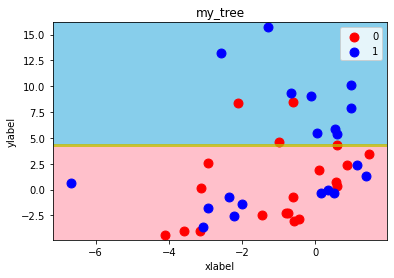

In [21]:
decision_region(X, y, my_tree, title="my_tree")

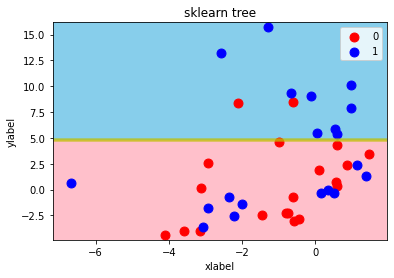

In [22]:
decision_region(X, y, sk_tree, title="sklearn tree")

# Problem 7 and Problem 8 
## Creation of a Decision Tree Classifier class for Depth 2
## Creating a Decision Tree Classifier Class with unlimited Depth

In [24]:
class Node():
    """
    Implement node
    """
    def __init__(self, class_count, depth):
        self.classes = class_count
        self.depth = depth
        self.feature_id = None
        self.threshold = None
        self.left_node = None
        self.right_node = None
    
    def is_leaf(self):
        return self.feature_id is None

class ScratchDecesionTreeClassifierDepthInf():
    """
    Scratch implementation of decision tree classifier with no depth limit

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, max_depth=99999, verbose=False):
        ## Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
        self.root_node = None
        
    def fit(self, X, y):
        depth = 0
        X, y = self._data_processing(X, y)
        
        self.classes = np.unique(y)
        self.root_node = self._grow(X, y, depth)
        
        pass
    
    def _grow(self, X, y, depth):
        uniques, counts = np.unique(y, return_counts=True)
        counter = dict(zip(uniques, counts))
        class_count = [counter[c] if c in counter else 0 for c in self.classes]
        
        this = Node(class_count, depth)
        if self._is_leaf(X, y):
            return this
        if self.max_depth == depth:
            return this
        
        left_X, left_y, right_X, right_y, feature_id, threshold = self._branch(X, y)
        
        this.left_node  = self._grow(left_X, left_y, this.depth + 1)
        this.right_node = self._grow(right_X, right_y, this.depth + 1)
        this.feature_id = feature_id
        this.threshold = threshold
        return this
        
    def _branch(self, X, y):
        best_gain = 0
        for col in range(X.shape[1]):
            for value in (X[:, col][1:] + X[:, col][:-1]) / 2:
                is_left = (X[:, col] <= value)
                y_left = y[is_left]
                y_right = y[~is_left]

                gain = _gain(y_left, y_right)

                if gain > best_gain:
                    best_gain = gain
                    feature_id = col
                    threshold = value
                    
        is_left = (X[:, feature_id] <= threshold)
        return X[is_left], y[is_left], X[~is_left], y[~is_left], feature_id, threshold
    
    def _gini(self, y):
        """
        Calculate Gini Impurity
        """
        ## Set the number of samples for each class
        _, labels_count = np.unique(y, return_counts=True) #[0, 1, 2], [15, 15, 15]
        labels_count_all = np.sum(labels_count) #45

        impurity = 1 - np.sum((labels_count / labels_count_all)**2)
        return impurity
    
    def _gain(self, y_left, y_right):
        """
        Calculate information gain
        """
        parent_node = np.concatenate([y_left, y_right])

        num_left, num_right = len(y_left), len(y_right)
        num_all = num_left + num_right

        left_ratio, right_ratio = (num_left / num_all), (num_right / num_all)

        gain = gini(parent_node) - (left_ratio * gini(y_left) + right_ratio * gini(y_right))
        return gain
    
    def _is_leaf(self, X, y):
        is_leaf = (y == y[0]).all() or (X == X[0]).all()
        return is_leaf
    
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier 
        """
        ## Initialize the return value as a list
        pred = []
        
       ## Data preprocessing
        X, _ = self._data_processing(X)
        
        for i in range(len(X)):
            node = self.root_node
            while not node.is_leaf():
                is_left = X[i, node.feature_id] <= node.threshold
                node = node.left_node if is_left else node.right_node
            pred_one = np.argmax(node.classes)
            pred.append(pred_one)
        
        pred = np.array(pred)
        return pred
    
    def _data_processing(self, X, y=None):
        ## If the dataset is DataFrame, Series, convert to ndarray
        if isinstance(X, (pd.DataFrame, pd.Series)):
            X = X.values
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.values
        
        ## If the dataset is one-dimensional, convert it to two-dimensional
        if X.shape[0] == X.size:
            X = X.reshape(-1, 1)

        return X, y

In [25]:
my_tree = ScratchDecesionTreeClassifierDepthInf()
my_tree.fit(X_train, y_train)
print("my_tree pred:", my_tree.predict(X_test))

sk_tree = DecisionTreeClassifier(random_state=0)
sk_tree.fit(X_train, y_train)
print("sklearn_tree pred:", sk_tree.predict(X_test))

print("y_test:", y_test)

my_tree pred: [1 1 1 0 0 1 0 1 0 1]
sklearn_tree pred: [0 1 1 0 0 1 0 0 0 1]
y_test: [1 1 1 0 0 0 1 0 0 1]


In [27]:
## Creating a learning model
my_tree_inf = ScratchDecesionTreeClassifierDepthInf()
sk_tree_inf = DecisionTreeClassifier()

model = {"scratch_model": my_tree_inf, "sklearn_model": sk_tree_inf}
results = pd.DataFrame(columns=["model_name", "accuracy", "precicion", "recall"])
i = 0

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("*"*20)
    print(name)
    print("Predict", y_pred)
    print("Answer", y_test)
    
    ac = accuracy_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    
    results.loc[i, :] = [name, ac, pr, re]
    i += 1

display(results)


********************
scratch_model
Predict [1 1 1 0 0 1 0 1 0 1]
Answer [1 1 1 0 0 0 1 0 0 1]
********************
sklearn_model
Predict [1 1 1 0 0 1 0 0 0 1]
Answer [1 1 1 0 0 0 1 0 0 1]


,model_name,accuracy,precicion,recall
0,scratch_model,0.7,0.666667,0.8
1,sklearn_model,0.8,0.8,0.8


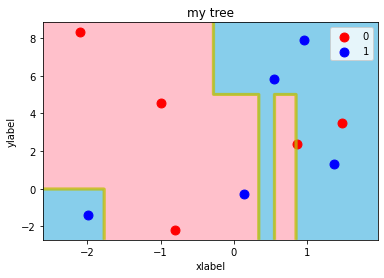

In [28]:
decision_region(X_test, y_test, my_tree_inf, title="my tree")

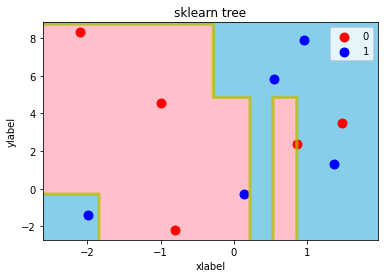

In [29]:
decision_region(X_test, y_test, sk_tree_inf, title="sklearn tree")